# P2 Project Submission
### By Garrett Busch 
### Apr 2017

## Introduction 

Baseball has long been considered America's pasttime.  It's hard to argue with considering the continued success, world intrigue, baseball coliseum's and the oh-so unforgetable comfort food. Looking past these inviting activities, your left with a game, just a game. This game, for the most part, has been played almost exactly the same way for 100+ years. 1 of the major reasons baseball has remained the same (aside from some mound changes, strikezone variation, baseball technology)  is because of the prevalence of statistics. 

In today's game, we have what are called saber-metrics that look to compare anything from  offensive prowess to defensive efficiency to pitcher accuracy & pitch selection.  In this project we will engineer our own metric for offensive ability (relatively simplistic at that) as we work with a dataset that is geared toward traditional baseball data points (Hit, At Bat, Home Run, etc.). The purpose of this project is to provide a logical data analysis project that ultimately seeks to help answer questions I pose.

Let's get started.

## Questions to be answered

In terms of individual and team performance, what were some of the  greatest disparities from an individuals season vs. the next best on the team? (an unequivocal MVP)
[See answer](#question1)

What players, over the course of their careers, had constantly faced the above matched environment?
[See answer](#question2)

How often was the MVP winner the leader in this statistic?
[See answer](#question3)

How did team's fare that matched this particular condition? Can a player truly "carry" the whole team?
[See answer](#question4)

## Noteable considerations

Because data is being summarized on a season level, any analysis, will have to be calculated at this level and because of this we risk favor/unfavoring: rookie seasons, injured seasons, etc. In the case of valuing a players offensive contribution the previously mentioned will undoubtedly discount a players total contribution as they may have not been available or present in order to contribute.

## Resources used

Python docs https://docs.python.org/3/

##  Verify and checking data

Generally, we'd like to take an initial dive into the data either to identify holes, anomolies, etc.. 

We'll need to import some initial libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pandas.tools.plotting as pdplt
from datetime import date
from datetime import datetime
plt.style.use('ggplot')
%matplotlib inline

Lets also  include the links to the associated data.

In [2]:
GHreposit = "https://raw.githubusercontent.com/garrettbusch15/P2-Baseball-Analysis-Project/"
subfolder = "master/Data/"

Now read the data in.

In [3]:
# Shift-Tab to see paramters/help for function
fileMaster = pd.read_csv(GHreposit + subfolder + 'Master.csv')
fileBatting = pd.read_csv(GHreposit + subfolder + 'Batting.csv')
fileTeam = pd.read_csv(GHreposit + subfolder + 'Teams.csv')
fileAwards = pd.read_csv(GHreposit + subfolder + 'AwardsPlayers.csv')

In [4]:
fileMaster.head(5)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,205.0,75.0,R,R,4/6/2004,9/28/2013,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,4/13/1954,10/3/1976,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,4/10/1962,9/26/1971,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,7/26/1977,10/3/1990,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,9/10/2001,4/13/2006,abada001,abadan01


The master seems like the best place to start.  We have a few different fields in the Master dataframe including text, dates and floating numbers.  There are a few fields worth filling out even if we may not neccessarily be directly using the fields in this analysis.

In [5]:
OverviewFM = fileMaster.columns.to_series().groupby(fileMaster.dtypes).groups
OverviewFM

{dtype('float64'): Index([u'birthYear', u'birthMonth', u'birthDay', u'deathYear', u'deathMonth',
        u'deathDay', u'weight', u'height'],
       dtype='object'),
 dtype('O'): Index([u'playerID', u'birthCountry', u'birthState', u'birthCity',
        u'deathCountry', u'deathState', u'deathCity', u'nameFirst', u'nameLast',
        u'nameGiven', u'bats', u'throws', u'debut', u'finalGame', u'retroID',
        u'bbrefID'],
       dtype='object')}

## Missing values/Conversion

In the below cells, we will look to ensure data reliability, fill in missing values and manipulate between the varying dataframes we've been given.

In [6]:
fileMaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18589 entries, 0 to 18588
Data columns (total 24 columns):
playerID        18589 non-null object
birthYear       18444 non-null float64
birthMonth      18274 non-null float64
birthDay        18117 non-null float64
birthCountry    18516 non-null object
birthState      17975 non-null object
birthCity       18389 non-null object
deathYear       9225 non-null float64
deathMonth      9224 non-null float64
deathDay        9223 non-null float64
deathCountry    9223 non-null object
deathState      9169 non-null object
deathCity       9219 non-null object
nameFirst       18549 non-null object
nameLast        18589 non-null object
nameGiven       18549 non-null object
weight          17717 non-null float64
height          17780 non-null float64
bats            17399 non-null object
throws          17610 non-null object
debut           18399 non-null object
finalGame       18399 non-null object
retroID         18535 non-null object
bbrefID        

In [7]:
# 1/24/15 is the date of this data's publishing
fileMaster['finalGame'].fillna('1/24/2015', inplace=True)
fileMaster['debut'] = pd.to_datetime(fileMaster['debut'])
fileMaster['finalGame'] = pd.to_datetime(fileMaster['finalGame'])

We also will have a few fields that can simply  be calculated by what we have available that may be useful down the road.

In [8]:
fileMaster['careerLength'] = fileMaster['finalGame'] - fileMaster['debut']

One of the questions we've outlined above wants to see performance results of 'warm-weather born players' vs. all the others. The 'warm-weather' states have been outlined above but are is generally the southern half of the US.

In [9]:
fair_weather_stats = ['CA','TX','FL','AZ','NV','NM', 'GA', 'LA', 'AL', 'MS']

In [10]:
fileMaster['StateWeather'] = fileMaster['birthState'].map(lambda x: True if x in fair_weather_stats else False)

At this point, below is what the master dataframe looks like:

In [11]:
fileMaster.head(1)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,careerLength,StateWeather
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,205.0,75.0,R,R,2004-04-06,2013-09-28,aardd001,aardsda01,3462 days,False


In [12]:
fileBatting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99846 entries, 0 to 99845
Data columns (total 22 columns):
playerID    99846 non-null object
yearID      99846 non-null int64
stint       99846 non-null int64
teamID      99846 non-null object
lgID        99109 non-null object
G           99846 non-null int64
AB          94697 non-null float64
R           94697 non-null float64
H           94697 non-null float64
2B          94697 non-null float64
3B          94697 non-null float64
HR          94697 non-null float64
RBI         94273 non-null float64
SB          93397 non-null float64
CS          71243 non-null float64
BB          94697 non-null float64
SO          86859 non-null float64
IBB         58134 non-null float64
HBP         91887 non-null float64
SH          88359 non-null float64
SF          58665 non-null float64
GIDP        68589 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 15.6+ MB


We can now look to round out the batting dataframe of the data.
For this there are a number of common statistics i.e. batting average, on-base percentage, slugging and OPS+ that are not included in the data. Also, we will add one measurement which is a product of AB's and OPS+, which attempts to model the contributed offensive effort are player added in a season. It is this measurement that we will use to measure value added by a players contribution. In a more  comprehensive dataset this would be known as "WAR" or wins-above-replacement.

*Generally, these statistics are rounded to 3 decimal places for presentation.

**The below resulting dataframe essentially gives us performance by player by season.

In [13]:
def c_num(s):
    try:
        return float(s)
    except Exception:
        return 0
def f_Avg(AB, H):
    return round(H / AB,3)
def f_Obp(H,BB,IBB,HBP,SF,AB):
    n = (H + BB + HBP)
    d = (AB + BB + HBP + SF)
    return round(n / d,3)
def f_Slug(H, Dbl, Trpl, HR, AB):
    return round(((H - Dbl - Trpl - HR) + (Dbl * 2) + (Trpl * 3) + (HR * 4)) / AB,3)

Now these calculation will be used in calculating the dataframe.

In [14]:
# Insert common hitting statistics into batting dataframe
fileBatting.fillna(0, inplace=True)
fileBatting['statBA'] = fileBatting.apply(lambda row: f_Avg(row['AB'],row['H']) if row['AB'] != 0 else 0, axis=1)
fileBatting['statOBP'] = fileBatting.apply(lambda row: f_Obp(row['H'],row['BB'],row['IBB'],row['HBP'],row['SF'],row['AB']) if (row['AB']+ row['BB'] + row['HBP'] + row['SF']) != 0 else 0, axis=1)
fileBatting['statSLUG'] = fileBatting.apply(lambda row: f_Slug(row['H'],row['2B'],row['3B'],row['HR'],row['AB']) if row['AB'] != 0 else 0, axis=1)
fileBatting['statOPS+'] = fileBatting['statOBP'] + fileBatting['statSLUG']
fileBatting['statOpsWght'] = fileBatting.apply(lambda row: (row['statOPS+'] * row['AB']), axis=1)

Now we'd like to begin performing some useful analysis/comparisons. In order to do so we will need to summarize this data across multiple seasons, teams & stats.

First, we will outline the stats we will summarize.

In [15]:
stats_to_summarize = {
    # 'G':0,
    # 'AB':0,
    'R':0,
    'H':0,
    '2B':0,
    '3B':0,
    'HR':0,
    'BB':0,
    'RBI':0,
    'SO':0,
    'IBB':0,
    'HBP':0,
    'SH':0,
    'SF':0
    # 'lgAvg':[]
    # 'lgObp':[]
    # 'lgSlug':[]
    # 'lgOps+':[]
    # 'lgOpsWght':[]
}

Now lets summarize the data into a dataframe with both the master and batting data. Merging on the 'playerID' field will give us the desired result.

In [16]:
master_player_season = pd.merge(fileMaster, fileBatting, on='playerID', how='outer')
master_player_season.head(1)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,IBB,HBP,SH,SF,GIDP,statBA,statOBP,statSLUG,statOPS+,statOpsWght
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will also add a TRUE/FALSE column for MVP award..

What different type of awards are in this dataset? (fileAwards)

In [17]:
fileAwards.awardID.unique()

array(['Pitching Triple Crown', 'Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player',
       'TSN All-Star', 'TSN Guide MVP',
       'TSN Major League Player of the Year', 'TSN Pitcher of the Year',
       'TSN Player of the Year', 'Rookie of the Year', 'Babe Ruth Award',
       'Lou Gehrig Memorial Award', 'World Series MVP', 'Cy Young Award',
       'Gold Glove', 'TSN Fireman of the Year', 'All-Star Game MVP',
       'Hutch Award', 'Roberto Clemente Award', 'Rolaids Relief Man Award',
       'NLCS MVP', 'ALCS MVP', 'Silver Slugger', 'Branch Rickey Award',
       'Hank Aaron Award', 'TSN Reliever of the Year',
       'Comeback Player of the Year'], dtype=object)

As we want "Most Valuable Player" (in each respective league) we can code this as so..

In [18]:
subMast = master_player_season[['playerID', 'yearID']]
subAwad = fileAwards.query('awardID=="Most Valuable Player"')[['playerID', 'yearID']]
master_player_season.loc[pd.merge(subMast, subAwad, on=['playerID', 'yearID'], right_index=True).index, 'MVP'] = 1
master_player_season['MVP'].fillna(0, inplace=True)

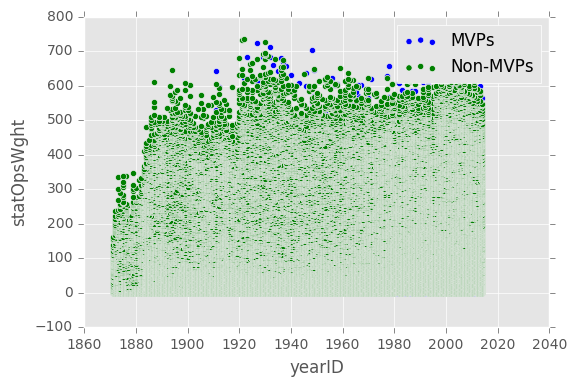

In [19]:
mp1 = master_player_season[['statOpsWght','yearID', 'playerID', 'MVP']].groupby(['statOpsWght','yearID']).sum().reset_index()
ax = mp1.query('MVP==1').plot.scatter(x='yearID', y='statOpsWght', color='Blue', label='MVPs')
mp1.query('MVP==0').plot.scatter(x='yearID', y='statOpsWght', color='Green', label='Non-MVPs', ax=ax)

For a cleaner look at the data lets look at the top 5 for each season.

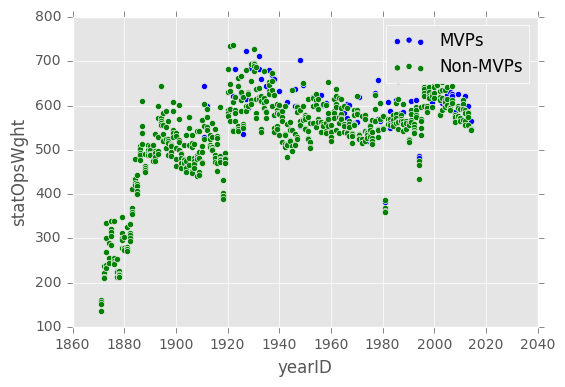

In [20]:
mp1 = master_player_season[['statOpsWght','yearID','playerID','MVP']].groupby('yearID').apply(lambda dfg: dfg.nlargest(5, 'statOpsWght')).reset_index(drop=True)
ax = mp1.query('MVP==1').plot.scatter(x='yearID', y='statOpsWght', color='Blue', label='MVPs')
mp1.query('MVP==0').plot.scatter(x='yearID', y='statOpsWght', color='Green', label='Non-MVPs', ax=ax)

Things we can denote from the above plot:
1) MVP awards were not given out until ~1917 season.
2) The # of baseball games and therefore the # of at bats didn't start to rise until the late 1800's. The game also saw another considerable jump in ~1923.
3) There were a few strike shortened seasons that shortened the # of games played.

You can see from the above that the columns on the end were what we calculated in the batting column and them as well as other batting fields have been layered onto the master data.

Next, we can begin summarizing at the team level.

*We instantiate new functions for avg/obp/slug here as were are looking up based on 2 variables.

In [21]:
def f_Parse_AVG(yr, team):
    tmp = fileBatting[(fileBatting.teamID == team) & (fileBatting.yearID == yr)].sum()
    H = tmp['H']
    AB = tmp['AB']
    return f_Avg(AB, H)
def f_Parse_OBP(yr, team):
    tmp = fileBatting[(fileBatting.teamID == team) & (fileBatting.yearID == yr)].sum()
    H = tmp['H']
    BB = tmp['BB']
    IBB = tmp['IBB']
    HBP = tmp['HBP']
    SF = tmp['SF']
    AB = tmp['AB']
    return f_Obp(H,BB,IBB,HBP,SF,AB)
def f_Parse_SLUG(yr, team):
    tmp = fileBatting[(fileBatting.teamID == team) & (fileBatting.yearID == yr)].sum()
    H = tmp['H']
    AB = tmp['AB']
    Dbl = tmp['2B']
    Trpl = tmp['3B']
    HR = tmp['HR']
    return f_Slug(H,Dbl,Trpl,HR,AB)


In [22]:
def unique_team_season():
    tms = fileBatting[['yearID', 'teamID']].copy()
    tms.drop_duplicates(inplace=True)   
    tms['team_BA'] = tms.apply(lambda w: f_Parse_AVG(w['yearID'],w['teamID']), axis=1)
    tms['team_OBP'] = tms.apply(lambda w: f_Parse_OBP(w['yearID'],w['teamID']), axis=1)
    tms['team_SLUG'] = tms.apply(lambda w: f_Parse_SLUG(w['yearID'],w['teamID']), axis=1)
    tms['team_OPS+'] = tms['team_OBP'] + tms['team_SLUG']
    tms['team_OpsWght'] = tms.apply(lambda w: (w['team_OPS+'] * fileBatting[(fileBatting.teamID == w['teamID']) & (fileBatting.yearID == w['yearID'])].sum()['AB']), axis=1)
    return tms

In [23]:
team_stat_summary = unique_team_season()
team_stat_summary.head(1)

,yearID,teamID,team_BA,team_OBP,team_SLUG,team_OPS+,team_OpsWght
0,1871,TRO,0.308,0.334,0.417,0.751,937.248


From the finished result above we have the relevent metrics each team outputted by season.

This is critical in our next step as we look to compare an individuals performance by that of his teammates.

In [24]:
master_player_team = pd.merge(master_player_season, team_stat_summary, on=['yearID','teamID'], how='outer')
master_player_team['%_team_OPS+'] = master_player_team['statOpsWght'] / master_player_team['team_OpsWght']

In [25]:
master_player_team.head(1)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,statSLUG,statOPS+,statOpsWght,MVP,team_BA,team_OBP,team_SLUG,team_OPS+,team_OpsWght,%_team_OPS+
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.27,0.357,0.438,0.795,4409.07,0.0


Next, we need a procedure that will pull a unique list of  years (from batting data) and summarize across the league how players performed in that particular season.

In [26]:
def season_stat_compiliation():
    dicBat = {}
    for year in pd.unique(fileBatting.yearID.ravel()):
        dicBat[float(year)] = season_offense_summary(year)
    return pd.DataFrame.from_dict(dicBat)

In [27]:
def season_offense_summary(year):
    dicSum = {}
    dicSum['Players'] = len(fileBatting.loc[fileBatting['yearID'] == year])
    dicSum['Teams'] = len(pd.unique(fileBatting.loc[(fileBatting['yearID'] == year), 'teamID'].ravel()))
    dicSum['AB'] = fileBatting.loc[(fileBatting['yearID'] == year), 'AB'].sum()
    dicSum['G'] = fileBatting.loc[(fileBatting['yearID'] == year), 'G'].sum()
    for stat in stats_to_summarize.keys():
        dicSum[stat] = fileBatting.loc[(fileBatting['yearID'] == year), stat].sum()
        dicSum[stat + '_G'] = round(fileBatting.loc[(fileBatting['yearID'] == year), stat].sum() / dicSum['G'],4)
        dicSum[stat + '_AB'] = round(fileBatting.loc[(fileBatting['yearID'] == year), stat].sum() / dicSum['AB'],4)
    dicSum['lgAvg'] = f_Avg(dicSum['AB'],dicSum['H'])
    dicSum['lgObp'] = f_Obp(dicSum['H'],dicSum['BB'],dicSum['IBB'], dicSum['HBP'],dicSum['SF'],dicSum['AB'])
    dicSum['lgSlug'] = f_Slug(dicSum['H'],dicSum['2B'],dicSum['3B'],dicSum['HR'],dicSum['AB'])
    dicSum['lgOps+'] = dicSum['lgObp'] + dicSum['lgSlug']
    dicSum['lgOpsWght'] = dicSum['AB'] * dicSum['lgOps+']
    dicSum['lgOpsWghtAvg'] = dicSum['lgOpsWght'] / (9 * dicSum['Teams'])
    
    return dicSum

We can then run the above.

In [28]:
league_stat_summary = season_stat_compiliation()

In [30]:
g = league_stat_summary.columns.to_series().groupby(league_stat_summary.dtypes).groups
g

{dtype('float64'): Float64Index([1871.0, 1872.0, 1873.0, 1874.0, 1875.0, 1876.0, 1877.0, 1878.0,
               1879.0, 1880.0,
               ...
               2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0,
               2013.0, 2014.0],
              dtype='float64', length=144)}

In [31]:
master_player_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100030 entries, 0 to 100029
Data columns (total 59 columns):
playerID        100030 non-null object
birthYear       99842 non-null float64
birthMonth      99457 non-null float64
birthDay        99090 non-null float64
birthCountry    99940 non-null object
birthState      96616 non-null object
birthCity       99534 non-null object
deathYear       43150 non-null float64
deathMonth      43149 non-null float64
deathDay        43147 non-null float64
deathCountry    43147 non-null object
deathState      42933 non-null object
deathCity       43129 non-null object
nameFirst       99989 non-null object
nameLast        100030 non-null object
nameGiven       99989 non-null object
weight          98689 non-null float64
height          98752 non-null float64
bats            97990 non-null object
throws          98450 non-null object
debut           99840 non-null datetime64[ns]
finalGame       100030 non-null datetime64[ns]
retroID         99976 non-

In the above we've now created a 'master' relations dataframe from individual & team data. From this dataframe we've gone ahead and calculated a % column to calculate the portion of value (OPS weighted) of the player as % of the overall team's output.

Below are atleast some initial insights that are quite interesting.

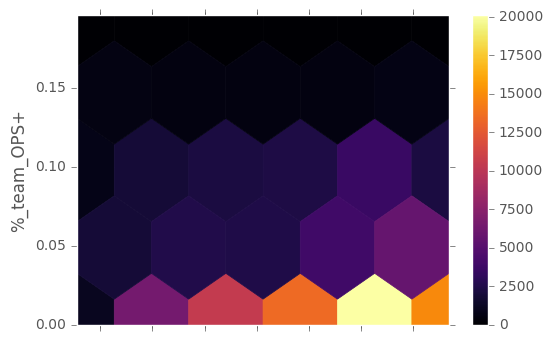

In [32]:
master_player_team[['%_team_OPS+','yearID', 'playerID']].plot.hexbin(x='yearID', y='%_team_OPS+',gridsize=5, cmap="inferno")

The above plot provides context as to the # of data points and a range of percent of team contribution within a time context. Similarly with the postive insight this provides, this also sheds light that the expansion of baseball has truly grown over time. The concept of expansion either could further this analysis or detract from it in away not yet understood.

In [33]:
def df_lookup(ind):
    return '%s %s @ %s in %s' % (master_player_team.ix[ind, 'nameFirst'], \
                             master_player_team.ix[ind, 'nameLast'], \
                             round(master_player_team.ix[ind, '%_team_OPS+'],3), \
                             master_player_team.ix[ind, 'yearID'])

In [34]:
time_filter = 1970
placement = master_player_team.loc[(master_player_team['yearID']>time_filter),'%_team_OPS+'].argmax()
print df_lookup(placement)

Sammy Sosa @ 0.164 in 2001.0


Now we can grab some answers to our questions.

<a id='#question1'></a>
### In terms of individual and team performance, what were some of the greatest individual offensive seasons in terms of contribution to overall team play? (an equivocal MVP)

In [35]:
master_player_team[(master_player_team.yearID > 1901)].sort_values('%_team_OPS+', ascending=False).head(5)[['playerID','nameFirst', 'nameLast', '%_team_OPS+', 'yearID', 'MVP']]

,playerID,nameFirst,nameLast,%_team_OPS+,yearID,MVP
72023,musiast01,Stan,Musial,0.182107,1948.0,1.0
93237,cobbty01,Ty,Cobb,0.174210,1917.0,0.0
13890,lajoina01,Nap,Lajoie,0.173805,1910.0,0.0
100028,stonege01,George,Stone,0.172135,1906.0,0.0
80988,kleinch01,Chuck,Klein,0.169715,1933.0,0.0


From the above table we can see than Stan Musial's 1948 season was the most of a single team's offensive output in any season (looking at teams after 1900). If you take a look at the 1948 Cardinals season, you will see that Stan's MVP season truly stood out from the rest.

http://www.baseball-reference.com/teams/STL/1948.shtml

<a id='#question2'></a>
### What players, over the course of their careers, had constantly faced the above matched environment?

In [36]:
Ser1 = master_player_team[(master_player_team.debut > date(year=1901,month=1,day=1))].groupby(['playerID'])['statOpsWght'].sum().iloc[0:]
Ser2 = master_player_team[(master_player_team.debut > date(year=1901,month=1,day=1))].groupby(['playerID'])['team_OpsWght'].sum().iloc[0:]
Ser_Result = Ser1/Ser2
Ser_Result.sort_values(ascending=False, inplace=True)
Ser_Result.head(5)

playerID
abreujo02    0.136576
pujolal01    0.132539
cabremi01    0.128744
aaronha01    0.127516
mccutan01    0.127388
dtype: float64

In [37]:
#master_player_team[(master_player_team['playerID'] == 'johnsbo01')][['playerID', 'nameGiven', 'nameLast']]

Interestingly enough, the top 10 is as follows:
Jose Abreu
Albert Pujols
Miguel Cabrera
Hank Aaron
Andrew Mccutchen
Kirby Pucket
Robert Johnson
Stan Musial
Ty Cobb
Joe Dimaggio

Firstly, the top ranked player, Jose Abreu, is in the 4th year of his career; however, because we are dealing with 2014 data this only recognizes Jose's stellar rookie season (one in which, the Chicago White Sox were also a bad team offensively). The next player on the list, Albert Pujols, may go down as one of the greatest players of all-time when his career is over. On one hand, Albert's place on this list is supported by the superiority of his offensive numbers but also because of the lack of a truly defined 'partner', of which, he was able to share the offensive load. In reflection of his career the Cardinals were able to build success during his time from a stellar pitching staff, Albert and a collection of 'league-average' offensive support at many positions.

<a id='#question3'></a>
## How often was the MVP winner the leader in this statistic?

i.e. How often was an MVP given to the process identified above?

In [38]:
#master_player_team[(master_player_team.debut > date(year=1900,month=1,day=1))].groupby(['yearID','lgID'])[['%_team_OPS+', 'playerID', 'MVP']].max()
question3 = master_player_team[(master_player_team.debut > date(year=1901,month=1,day=1))].\
ix[master_player_team[(master_player_team.debut > date(year=1901,month=1,day=1))].\
   groupby(['yearID','lgID'])['%_team_OPS+'].idxmax()][['yearID','lgID','%_team_OPS+', 'playerID', 'MVP']]

round(question3['MVP'].sum() / len(question3.index),3)

0.174

Only 17% of the time since 1901 has the league MVP (AL or NL) been also the highest rated per this statistic.

<a id='#question4'></a>
## How did team's fare that matched this particular condition? Can a player truly "carry" the load?

One of the key components of this question will be in determining the threshhold, at which, a significant portion of the team's offensive output came from 1 player. 

In [39]:
decision_point = .13
fileTeam['Reliant'] = fileTeam.apply(lambda row: True if master_player_team.loc[(row['yearID'] == master_player_team.yearID) & (row['teamID'] == master_player_team.teamID),'%_team_OPS+'].max() > decision_point else False, axis=1)

In [40]:
master_player_team = pd.merge(fileTeam.loc[:,['yearID','teamID','W','L','Reliant']], master_player_team, on=['yearID', 'teamID'], how='outer')
master_player_team.head(1)

,yearID,teamID,W,L,Reliant,playerID,birthYear,birthMonth,birthDay,birthCountry,...,statSLUG,statOPS+,statOpsWght,MVP,team_BA,team_OBP,team_SLUG,team_OPS+,team_OpsWght,%_team_OPS+
0,1871.0,BS1,20.0,10.0,True,barnero01,1850.0,5.0,8.0,USA,...,0.58,1.027,161.239,0.0,0.31,0.339,0.422,0.761,1044.092,0.15443


In [41]:
df_temp = master_player_team[(master_player_team.yearID > 1901)].groupby(['Reliant','teamID','yearID']).mean()[['W','L']]
print(str(round(df_temp.query('Reliant == True').sum()['W'] / (df_temp.query('Reliant == True').sum()['W'] + df_temp.query('Reliant == True').sum()['L']),3)) + ' winning percentage for teams reliant on 1 good player')

0.513 winning percentage for teams reliant on 1 good player


From the above we can see that, over the course of time, if anyone player on the team contributed > 13% the team's offensive output, these teams had a slightly higher winning percentage. Now, this doesn't permit causation, as many factors can be contributed to this result; however, the prevalence of one player being this significant can't be ingnored as the nature of "theres no I in team" is being brought into focus. One could surmize that maybe because one player is so significantly relied upon, the rest of the team can focus on being "average" or doing their part for the betterment of the team.

## Limits/Reflections

The above process attempts to outline an approach that helps to distinguish 'exceptional' offense performance. With that, there resides many limitations with data as well as some differing ways in how this could've been approached. For instance, the data is in a traditional format of being summarized at a yearly level. In the interest of how baseball data can be summarized there could be many levels of detail below this including: game by game data, batter/pitch data, etc. Following this trend we can also see the effect of varying seasons when we summarize at this level. As mentioned in the above outlined questions, there sometimes isn't an apples to apples comparison of a player who's OPS was 1.013 in only 32 at bats vs. a player who's OPS was .813 in 600 at bats. Some of these yearly comparisons would be at no fault to the data detail process as players get injured and miss time as well as being promoted midway thru a season. In the basis of this project, a statistical test was not used in determining exceptional offense performance (which was the prevelant theme of the questions). The main basis for this approach was that we were looking to test a dependent variable and not neccessarily that outcome/effect of an independent variable. An independent/dependent variable relationship was examined at the end in regards to teams that 'fit' the criteria of relying on 1 player vs. not. Additional data or analysis that could be supported or provided maybe in the area of 'smoothing' or 'machine learning' in regards to incomplete seasons or grossly inhibited seasons.